In [2]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, GridSearchCV
import pickle

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

matplotlib.rcParams.update({'font.size': 10})

In [3]:
test_file = 'mlearning/test.csv'
train_file = 'mlearning/train.csv'
sample_file = 'mlearning/sample_submission.csv'

In [4]:
test = pd.read_csv(test_file)
train = pd.read_csv(train_file)
sample = pd.read_csv(sample_file)

## Просмотр данных

- Id - идентификационный номер квартиры
- DistrictId - идентификационный номер района
- Rooms - количество комнат
- Square - площадь
- LifeSquare - жилая площадь
- KitchenSquare - площадь кухни
- Floor - этаж
- HouseFloor - количество этажей в доме
- HouseYear - год постройки дома
- Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
- Social_1, Social_2, Social_3 - социальные показатели местности
- Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
- Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
- Price - цена квартиры

In [5]:
train = train.merge(test, how='outer')
df = train.sort_values(by=['Price'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 9732 to 14999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             15000 non-null  int64  
 1   DistrictId     15000 non-null  int64  
 2   Rooms          15000 non-null  float64
 3   Square         15000 non-null  float64
 4   LifeSquare     11846 non-null  float64
 5   KitchenSquare  15000 non-null  float64
 6   Floor          15000 non-null  int64  
 7   HouseFloor     15000 non-null  float64
 8   HouseYear      15000 non-null  int64  
 9   Ecology_1      15000 non-null  float64
 10  Ecology_2      15000 non-null  object 
 11  Ecology_3      15000 non-null  object 
 12  Social_1       15000 non-null  int64  
 13  Social_2       15000 non-null  int64  
 14  Social_3       15000 non-null  int64  
 15  Healthcare_1   7825 non-null   float64
 16  Helthcare_2    15000 non-null  int64  
 17  Shops_1        15000 non-null  int64  
 18  Sho

In [7]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9732,13237,144,2.0,51.726692,30.547287,8.0,2,14.0,1988,0.306977,B,B,27,5148,14,1575.0,5,7,B,59174.778028
3605,7243,9,2.0,58.089253,52.460857,8.0,5,22.0,1981,0.136244,B,B,11,2370,0,NaN,0,1,B,59877.592523
7850,8800,23,1.0,29.706031,NaN,0.0,5,12.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,60502.583500
9961,1579,23,1.0,27.331108,NaN,1.0,10,12.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,60825.032060
6856,2648,23,1.0,34.670830,NaN,0.0,4,0.0,1977,0.005767,B,B,1,388,0,NaN,0,0,B,60828.260686


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,15000.0,8393.136933,4850.111673,0.000000,4188.750000,8378.500000,12594.250000,1.679800e+04
DistrictId,15000.0,50.693600,43.786257,0.000000,20.000000,37.000000,75.000000,2.120000e+02
Rooms,15000.0,1.897000,0.839229,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,15000.0,56.360350,20.423913,1.136859,41.814371,52.645757,66.036608,6.410652e+02
LifeSquare,11846.0,36.851792,71.120183,0.333490,22.896130,32.822810,45.144624,7.480592e+03
KitchenSquare,15000.0,6.174467,24.016979,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,15000.0,8.561800,5.323113,1.000000,4.000000,7.000000,12.000000,7.800000e+01
HouseFloor,15000.0,12.606600,6.780165,0.000000,9.000000,12.000000,17.000000,1.170000e+02
HouseYear,15000.0,3321.575067,163707.780381,1908.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,15000.0,0.119196,0.119371,0.000000,0.017647,0.075424,0.195781,5.218671e-01


## Распределение целевого признака

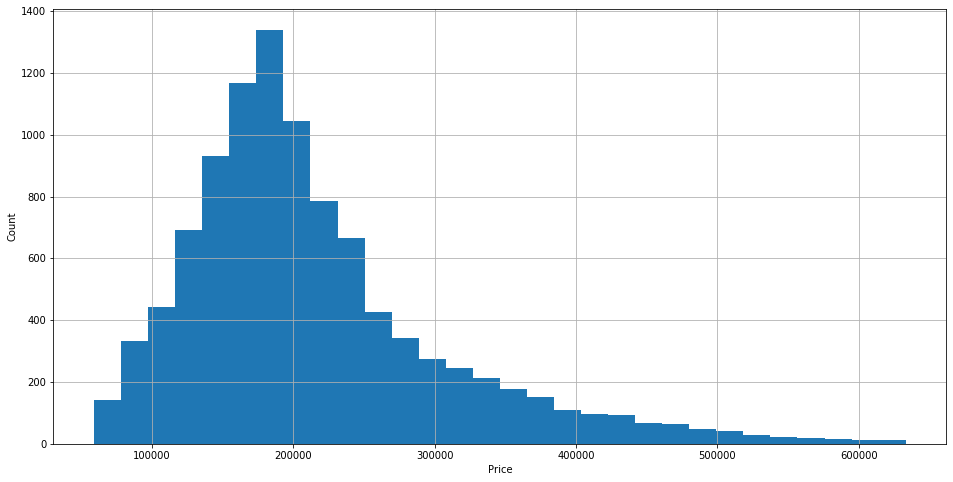

In [62]:
plt.figure(figsize = (16, 8))

train['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')
plt.show()

In [15]:
len(short_train['Healthcare_1'].unique())

79

## Изменение типов данных

Количество комнат и этажность дома - это всегда целые числа. А Площадь кухни - не может быть целым числом. Поэтому меняем формат.

In [63]:
train['Rooms'] = train['Rooms'].astype(int)
train['HouseFloor'] = train['HouseFloor'].astype(int)
train['KitchenSquare'] = train['KitchenSquare'].astype(float)
train['Ecology_2'] = (train['Ecology_2'] == 'A').astype(int)
train['Ecology_3'] = (train['Ecology_3'] == 'A').astype(int)
train['Shops_2'] = (train['Shops_2'] == 'A').astype(int)

In [64]:
list_float64 = train.dtypes[train.dtypes=='float64'].index
train[list_float64] = train[list_float64].astype('float32')
list_in64 = train.dtypes[train.dtypes=='int64'].index
train[list_in64] = train[list_in64].astype('int32')

## Заполнение пропусков

Заполняем пропуски в LifeSquare. Пропущено примерно 20% значений. Заполняем данным по общей площади, так медианные значения могут быть больше.

In [65]:
train.loc[train['LifeSquare'].isnull(), 'LifeSquare'] = train['Square']

В Healthcare_1 очень много пропусков - почти 50% значений. Чтобы заполнить более точными данными, решил ориентироваться на второй признак в этой группе - Helthcare_2.

In [66]:
train['Helthcare_2'].unique()

array([5, 0, 1, 6, 3, 2, 4], dtype=int32)

<function matplotlib.pyplot.show(*args, **kw)>

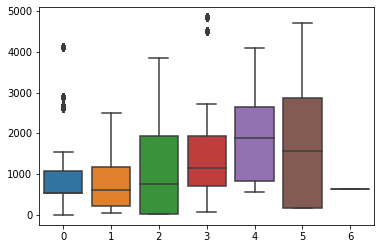

In [9]:
short_train = train.loc[train['Healthcare_1'].notnull()]
hc1 = list(short_train['Healthcare_1'])
hc2 = list(short_train['Helthcare_2'])
sns.boxplot(hc2, hc1)
plt.show

И заполнить медиаными значениями для пропущенных значений.

In [68]:
col1 = 'Healthcare_1'
col2 = 'Helthcare_2'

median = train.groupby(col2).median()

for i in range(len(train[col2].unique())):
    train.loc[(train[col1].isnull())&(train[col2] == i), col1] = median.loc[i, col1]
    i = i+1

## Обработка выбросов

Обработка максимальных значений

In [69]:
train.loc[train['HouseYear'] > 2020, 'HouseYear']

4189        4968
1497    20052011
Name: HouseYear, dtype: int32

In [70]:
train.loc[train['HouseYear'] > 2020, 'HouseYear'] = train['HouseYear'].median()

In [71]:
train.loc[train['LifeSquare'] > 1000, ['Square', 'LifeSquare', 'KitchenSquare']]

,Square,LifeSquare,KitchenSquare
4328,81.69442,7480.592285,1.0


In [72]:
train.loc[train['LifeSquare'] > 1000, 'LifeSquare'] = train['Square']

Изменение выбросов Площади кухни.

In [73]:
train.loc[train['KitchenSquare'] > 10, ['Square', 'LifeSquare', 'KitchenSquare']]

,Square,LifeSquare,KitchenSquare
1884,61.342411,33.767601,12.0
8850,35.104103,36.497749,12.0
9823,49.831490,19.359980,11.0
696,94.417145,56.749168,11.0
2410,61.464283,30.289515,13.0
...,...,...,...
14899,87.358307,48.261597,11.0
14929,52.507713,21.368216,13.0
14960,86.719154,52.019073,11.0
14975,110.366486,77.705849,20.0


In [74]:
train.loc[train['KitchenSquare'] > 10, 'KitchenSquare'] = train['KitchenSquare'].median()

Вряд ли можно встретить десятикомнатную квартиру общей плошадью 40-60 кв метров...

In [75]:
train.loc[train['Rooms'] > 7, ['Rooms', 'Square']]

,Rooms,Square
1454,19,42.006046
8849,10,60.871265
377,10,59.056976
13398,17,52.866108


In [76]:
train.loc[train['Rooms'] > 7, 'Rooms'] = train['Rooms'].median()

Обработка минимальных значений

In [77]:
train.loc[train['Rooms'] == 0, ['Rooms', 'Square']]

,Rooms,Square
2269,0.0,41.790882
4853,0.0,2.377248
6149,0.0,38.697117
4366,0.0,81.491447
3911,0.0,49.483501
8834,0.0,87.762619
1397,0.0,138.427689
1981,0.0,212.932358
12406,0.0,116.824203
12524,0.0,76.345154


In [78]:
train.loc[train['Rooms'] == 0, 'Rooms'] = train['Rooms'].median()

Этажность дома должна быть как минимум 1 этаж, но не ниже этажа недвижимости.

In [79]:
train.loc[train['HouseFloor'] == 0, ['Floor' ,'HouseFloor']]

,Floor,HouseFloor
6856,4,0
7787,2,0
3190,2,0
2763,12,0
8249,2,0
...,...,...
14856,10,0
14887,20,0
14892,4,0
14976,6,0


In [80]:
train.loc[train['HouseFloor'] == 0, 'HouseFloor'] = train['Floor']

In [81]:
train.loc[train['Square'] < 10, 'Square'] = train['Square'].median()
train.loc[train['LifeSquare'] < 10, 'LifeSquare'] = train['Square']

## Добавление признака "Средняя цена за 1 кв метр в районе"

In [82]:
by_district_median = train.groupby('DistrictId').median()
Med_dis_1sqr_price = by_district_median['Price']/by_district_median['Square']
Med_dis_1sqr_price = pd.DataFrame(Med_dis_1sqr_price)
train = pd.merge(train, Med_dis_1sqr_price, on = 'DistrictId', how = 'right')
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,0
0,13237,144,2.0,51.726692,30.547287,8.0,2,14,1988.0,0.306977,...,0,27,5148,14,1575.0,5,7,0,59174.777344,4322.971191
1,2970,144,1.0,36.346024,22.223867,9.0,11,12,1969.0,0.306977,...,0,27,5148,14,1575.0,5,7,0,86504.500000,4322.971191
2,16699,144,1.0,30.055088,19.408867,5.0,5,5,1974.0,0.306977,...,0,27,5148,14,1575.0,5,7,0,156983.546875,4322.971191
3,7504,144,1.0,27.680040,16.499773,5.0,10,9,1978.0,0.306977,...,0,27,5148,14,1575.0,5,7,0,161354.593750,4322.971191
4,16237,144,2.0,44.815113,25.385263,5.0,3,5,1962.0,0.306977,...,0,27,5148,14,1575.0,5,7,0,174021.000000,4322.971191


Переименуем колонку и проверим отсутствие значений в новом признаке, так как ранее объединяли с тестовым файлом, где не было цен.

In [83]:
train.rename(columns={0: 'Med_dis_1sqr_price'}, inplace=True)
train['Med_dis_1sqr_price'].isnull().sum()

8

In [84]:
train.loc[train['Med_dis_1sqr_price'].isnull(), 'Med_dis_1sqr_price'] = train['Med_dis_1sqr_price'].median()

## Проверка несогласованных значений

Очевидно перепутаны значения "Жилая площадь" и "Общая площадь" 

In [85]:
train.loc[train['Square'] < train['LifeSquare'], ['Square', 'LifeSquare', 'KitchenSquare']]

,Square,LifeSquare,KitchenSquare
79,102.056969,105.272339,10.0
119,51.907936,53.788536,1.0
123,46.469860,50.703197,9.0
140,60.133240,60.238789,1.0
148,60.026794,63.611893,1.0
...,...,...,...
14798,46.765167,48.240135,1.0
14800,56.245995,58.572674,1.0
14801,51.329605,53.966049,1.0
14813,72.308968,72.576683,1.0


In [86]:
replace_value('Square', 'LifeSquare')

Проверим выбросы площади по отношению к цене

Text(0, 0.5, 'Price')

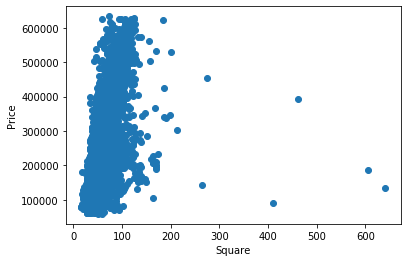

In [87]:
plt.scatter(train['Square'], train['Price'])
plt.xlabel('Square')
plt.ylabel('Price')

In [88]:
train.loc[(train['Square'] > 200)&(train['Price'] < 300000), ['Square', 'LifeSquare', 'KitchenSquare', 'Price']]

,Square,LifeSquare,KitchenSquare,Price
179,604.705994,604.705994,1.0,187717.250000
836,263.542023,48.449875,5.0,141780.234375
1646,641.065186,638.163208,10.0,133529.687500
7392,410.639740,409.425171,10.0,90470.429688


In [89]:
train.loc[(train['Square'] > 200)&(train['Price'] < 300000), 'Square'] = train['Square'].median()

In [90]:
train.loc[train['Square'] < train['LifeSquare'], ['Square', 'LifeSquare', 'KitchenSquare']]

,Square,LifeSquare,KitchenSquare
179,52.751938,604.705994,1.0
1646,52.751938,638.163208,10.0
7392,52.751938,409.425171,10.0


In [91]:
train.loc[train['Square'] < train['LifeSquare'], 'LifeSquare'] = train['Square']

Тоже самое "Этаж" и "Этажность дома"

In [92]:
train.loc[train['HouseFloor'] < train['Floor'], ['Floor', 'HouseFloor']]

,Floor,HouseFloor
3,10,9
5,16,14
9,6,5
14,7,5
19,18,17
...,...,...
14974,9,8
14987,10,9
14994,7,6
14996,8,7


In [93]:
replace_value('HouseFloor', 'Floor')

Проверим выбросы Этажности дома по отношению к цене

## Категориальные признаки и добавление новых

### 1. Объединение 2х социальных признаков в один.

Выявляем и с помощью PCA объединяем линейно зависимые признаки
Общая и жилая площади

Text(0, 0.5, 'Social 2')

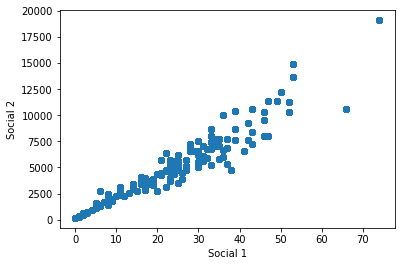

In [94]:
plt.scatter(train['Social_1'], train['Social_2'])
plt.xlabel('Social 1')
plt.ylabel('Social 2')

In [95]:
pca = PCA(n_components=1)
train['Social_pca'] = pca.fit_transform(train[['Social_1', 'Social_2']])
train = train.drop(['Social_1', 'Social_2'], axis=1)

### 2. Признак Big Square (большая площадь)

In [96]:
train['Big_Square'] = 0
train.loc[train['Square'] > 90, 'Big_Square'] = 1

### 3. Признак HouseYear_cluster

Text(0, 0.5, 'Price')

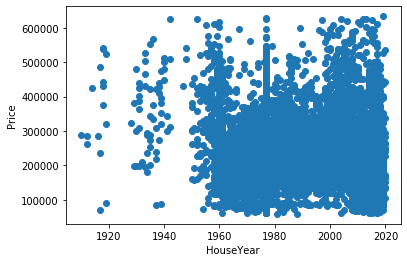

In [97]:
plt.scatter(train['HouseYear'], train['Price'])
plt.xlabel('HouseYear')
plt.ylabel('Price')

In [98]:
train['HouseYear_cluster'] = 0
train.loc[train['HouseYear'] < 1950, 'HouseYear_cluster'] = 1
train.loc[train['HouseYear'] < 1925, 'HouseYear_cluster'] = 2

In [99]:
train['HouseYear_cluster'].value_counts()

0    14871
1      102
2       27
Name: HouseYear_cluster, dtype: int64

### 4. Признак Ecology_1_cluster

Text(0, 0.5, 'Price')

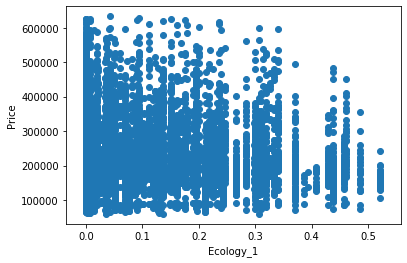

In [100]:
plt.scatter(train['Ecology_1'], train['Price'])
plt.xlabel('Ecology_1')
plt.ylabel('Price')

In [101]:
claster1_price = train.loc[train['Ecology_1'] >= 0.37, 'Price'].median()
claster2_price = train.loc[train['Ecology_1'] < 0.37, 'Price'].median()
print("Медианная цена при Экологии >= 0.37: ", claster1_price),
print("Медианная цена при Экологии < 0.37: ", claster2_price)

Медианная цена при Экологии >= 0.37:  168846.5625
Медианная цена при Экологии < 0.37:  194076.4375


In [102]:
train['Ecology_1_cluster'] = 0
train.loc[train['Ecology_1'] >= 0.37, 'Ecology_1_cluster'] = 1

In [103]:
train['Ecology_1_cluster'].value_counts()

0    14200
1      800
Name: Ecology_1_cluster, dtype: int64

### 5. Категорийные признаки

Переводим один из признаков здравоохранения в категорийный, так как у него только 7 значений

In [104]:
train['Big_Square'] = train['Big_Square'].astype(str)
train['HouseYear_cluster'] = train['HouseYear_cluster'].astype(str)
train['Ecology_1_cluster'] = train['Ecology_1_cluster'].astype(str)
train['Helthcare_2'] = train['Helthcare_2'].astype(str)
train['DistrictId'] = train['DistrictId'].astype(str)

In [105]:
train = pd.get_dummies(train)

## Разбиение на сеты

Сначала устанавливаем ID в качестве индекса.

In [106]:
train = train.set_index('Id')

Обратно разбиваем тренировочный и тестовый сеты

In [107]:
train_new = train.loc[train['Price'].notnull()]
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 13237 to 15193
Columns: 243 entries, Rooms to Ecology_1_cluster_1
dtypes: float32(7), float64(5), int32(5), uint8(226)
memory usage: 3.1 MB


In [108]:
test_new = train.loc[train['Price'].isnull()]
test_new = test_new.drop('Price', axis=1)
test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 14305 to 14024
Columns: 242 entries, Rooms to Ecology_1_cluster_1
dtypes: float32(6), float64(5), int32(5), uint8(226)
memory usage: 1.5 MB


Целевой признак - Цена на недвижимость

In [109]:
y = pd.Series(train_new['Price'])
y

Id
13237     59174.777344
2970      86504.500000
16699    156983.546875
7504     161354.593750
16237    174021.000000
             ...      
15838    428928.875000
16060    433346.406250
5930     432546.125000
4282     479525.156250
15193    486057.125000
Name: Price, Length: 10000, dtype: float32

Тренировочный и тестовые данные

In [110]:
X = train_new.drop('Price', axis=1)

In [111]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=100)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((7000, 242), (3000, 242), (7000,), (3000,))

## Построение модели

In [150]:
random_forest = RandomForestRegressor(random_state=100,
                                      max_depth=None,
                                      max_features=90,
                                      min_samples_leaf=2,
                                      n_estimators=600)

In [151]:
random_forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=90, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=None, oob_score=False,
                      random_state=100, verbose=0, warm_start=False)

In [152]:
y_pred = random_forest.predict(X_valid)

In [153]:
r2_score(y_valid, y_pred)

0.761120218662711

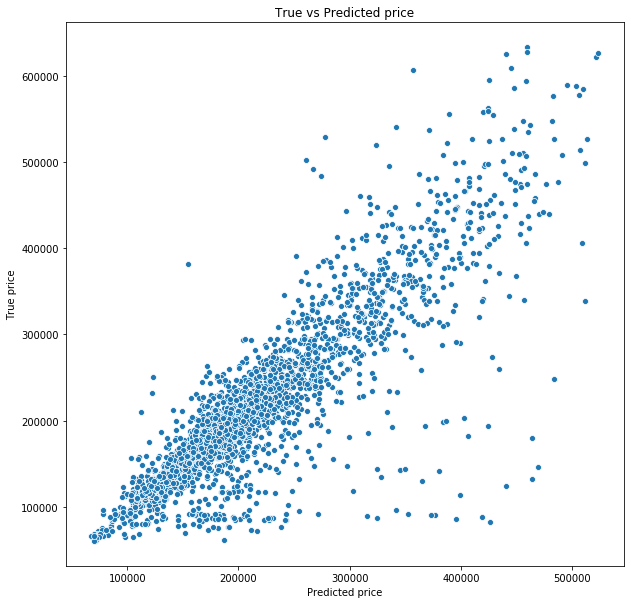

In [154]:
plt.figure(figsize=(10,10))
sns.scatterplot(y_pred, y_valid)
plt.xlabel('Predicted price')
plt.ylabel('True price')
plt.title('True vs Predicted price')
plt.show()

In [155]:
cv_score = cross_val_score(random_forest, X, y, scoring='r2', cv=KFold(n_splits=5, shuffle=True, random_state=100))
cv_score

array([0.77008533, 0.74232489, 0.77877069, 0.74748624, 0.75237746])

In [156]:
cv_score.mean()

0.7582089202446368

In [157]:
feature_importances = pd.DataFrame(zip(X_train.columns, random_forest.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False).head(20)

,feature_name,importance
1,Square,0.294381
14,Med_dis_1sqr_price,0.207637
0,Rooms,0.111486
15,Social_pca,0.062957
2,LifeSquare,0.061997
10,Social_3,0.038990
6,HouseYear,0.030940
5,HouseFloor,0.022557
3,KitchenSquare,0.019959
11,Healthcare_1,0.019722


## Прогноз для test.csv

In [158]:
X_train = X
X_test = test_new
y_train = y

In [159]:
random_forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=90, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=None, oob_score=False,
                      random_state=100, verbose=0, warm_start=False)

In [160]:
y_pred_test = random_forest.predict(X_test)
y_pred_test

array([194083.77542322, 450122.86105438, 161612.0223998 , ...,
       206091.32951403, 205249.5133344 , 182271.49993752])

In [161]:
test_new['Price'] = y_pred_test

In [162]:
test_price = test_new
NVPotseluev_predictions = pd.DataFrame(test_price['Price'])

In [163]:
NVPotseluev_predictions

,Price
Id,
14305,194083.775423
1662,450122.861054
13623,161612.022400
14129,193618.606499
1667,154471.186170
...,...
13382,209589.060764
9155,402625.856043
8845,206091.329514


In [165]:
NVPotseluev_predictions.to_csv('NVPotseluev_predictions.csv', sep=",")

# Алгоритм действий

## 1. Выбросы - объекты с реальными, но аномальными данными.

Нахождение выбросов по функции Шовене
Бесжалостно удалить такие объекты

## 2. Пропуски и ошибки в данных.

Шаг1: Обнаружить ошибочные значения и заменить их на NULL значения

Шаг2: Нормировать все значения с помощью StandardScaler

Шаг3: Выбрать метрику для заполнения пропущенных значений (Евклидовое расстояние, Манхеттана, MinMax значений, Коэфф. корелляции) и заполнить пропущенные значения.

P.S.:
1. При использовании Коэф кор нормировать данные не нужно
2. Если пропущенных значений много и их доля совпадает с целевым файлом, то возможно использовать отсутсвие значений как признак.

## 3. Когда признаки очень зависимы друг от друга, что делать

Один из зависимых признаков можно возвести в квадрат.

Или избавляться от таких признаков

## 4. Добавление новых признаков

1. Можно добавить новый признак состоящий из алгоритма KNN(метод ближайших соседей), который относит к одному из двух категориальных признаков на основании других (например, предсказывает деление по полу мужчина или женщина. На больших количествах признаков он не работает.